# Data Processing - Lap records in Formula 1

## Overview

Data Processing is one important phase during the _machine learning (ML) pipeline_. 

It usually works with Feature Engineering to transform data from a given form to a much more usable and desired form for ML models. 

By using Machine Learning algorithms, mathematical modeling, and statistical knowledge, this entire process can be automated. 
Data processing is a crucial step in the machine learning (ML) pipeline, as it prepares the data for use in building and training ML models. The goal of data processing is to clean, transform, and prepare the data in a format that is suitable for modeling.

The techniques involved in data processing could be various.e desired outcome.

<img src="../pictures/data-processing.png" width="400">

In [1]:
# import libraries

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import sklearn as sk
from datetime import timedelta
from ipywidgets import widgets, interact
pd.options.mode.chained_assignment = None

## (1) Data Acquisition - loading datasets

In [2]:
df_raw_lap_times = pd.read_csv('../data/01-raw/lap_times.csv')  
df_raw_pit_stops = pd.read_csv('../data/01-raw/pit_stops.csv')  
df_raw_races = pd.read_csv('../data/01-raw/races.csv')
df_raw_results = pd.read_csv('../data/01-raw/results.csv') 

## (2) Data Processing

### (2.1) Drop unnecessary features

In [3]:
df_raw_lap_times.drop(columns=['position', 'time'], inplace=True)
df_raw_lap_times.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds'], dtype='object')

In [4]:
df_raw_pit_stops.drop(columns=['stop', 'time', 'duration'], inplace=True)
df_raw_pit_stops.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds'], dtype='object')

In [5]:
df_raw_races.drop(columns=['round', 'circuitId', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], inplace=True)
df_raw_pit_stops.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds'], dtype='object')

In [6]:
df_raw_results.drop(columns=['constructorId', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'time', 'fastestLap', 'rank', 'fastestLapSpeed', 'statusId'], inplace=True)
df_raw_results.columns

Index(['resultId', 'raceId', 'driverId', 'number', 'laps', 'milliseconds',
       'fastestLapTime'],
      dtype='object')

### (2.2) Rename features and prepare to aggregation

In [7]:
df_raw_lap_times.rename(columns={"milliseconds":"milliseconds_each_lap"}, inplace=True)
df_raw_lap_times.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap'], dtype='object')

In [8]:
df_raw_pit_stops.rename(columns={"milliseconds":"pit_milliseconds"}, inplace=True)
df_raw_pit_stops.columns

Index(['raceId', 'driverId', 'lap', 'pit_milliseconds'], dtype='object')

In [9]:
df_raw_races.rename(columns={"name": "event_name", "date": "event_date", "time": "event_time"}, inplace=True)
df_raw_races.columns

Index(['raceId', 'year', 'event_name', 'event_date', 'event_time'], dtype='object')

In [10]:
df_raw_results.rename(columns={"number": "results_car_number", \
                               "laps": "total_laps", \
                               "milliseconds": "total_race_milliseconds", \
                               "fastestLapTime": "event_fastestLapTime"}, inplace=True)
df_raw_results.columns

Index(['resultId', 'raceId', 'driverId', 'results_car_number', 'total_laps',
       'total_race_milliseconds', 'event_fastestLapTime'],
      dtype='object')

### (2.3) Aggregate datasets - lap_time + pit_stops

In [11]:
pd_pit_lap = pd.merge(df_raw_lap_times, df_raw_pit_stops, how="left", on=['raceId', 'driverId', 'lap'])
print(pd_pit_lap.shape)
pd_pit_lap.columns

(551742, 5)


Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds'],
      dtype='object')

In [12]:
pd_pit_lap.iloc[33:38]

,raceId,driverId,lap,milliseconds_each_lap,pit_milliseconds
33,841,20,34,91871,NaN
34,841,20,35,92597,NaN
35,841,20,36,113737,24036.0
36,841,20,37,99321,NaN
37,841,20,38,93632,NaN


### (2.4) Filling Nan values

In [13]:
pd_pit_lap.fillna(0, inplace=True)
pd_pit_lap.iloc[33:38]

,raceId,driverId,lap,milliseconds_each_lap,pit_milliseconds
33,841,20,34,91871,0.0
34,841,20,35,92597,0.0
35,841,20,36,113737,24036.0
36,841,20,37,99321,0.0
37,841,20,38,93632,0.0


### (2.5) Aggregate datasets - lap_time + pit_stops + races

In [14]:
pd_pit_lap_races = pd.merge(pd_pit_lap, df_raw_races, how="left", on=['raceId'])
print(pd_pit_lap_races.shape)
pd_pit_lap_races.columns

(551742, 9)


Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds', 'year', 'event_name', 'event_date', 'event_time'],
      dtype='object')

In [15]:
pd_pit_lap_races.iloc[33:38]

,raceId,driverId,lap,milliseconds_each_lap,pit_milliseconds,year,event_name,event_date,event_time
33,841,20,34,91871,0.0,2011,Australian Grand Prix,2011-03-27,06:00:00
34,841,20,35,92597,0.0,2011,Australian Grand Prix,2011-03-27,06:00:00
35,841,20,36,113737,24036.0,2011,Australian Grand Prix,2011-03-27,06:00:00
36,841,20,37,99321,0.0,2011,Australian Grand Prix,2011-03-27,06:00:00
37,841,20,38,93632,0.0,2011,Australian Grand Prix,2011-03-27,06:00:00


In [16]:
pd_pit_lap_races.iloc[36]

raceId                                     841
driverId                                    20
lap                                         37
milliseconds_each_lap                    99321
pit_milliseconds                           0.0
year                                      2011
event_name               Australian Grand Prix
event_date                          2011-03-27
event_time                            06:00:00
Name: 36, dtype: object

### (2.6) Aggregate datasets - lap_time + pit_stops + races + results

In [17]:
pd_full_lap_info = pd.merge(pd_pit_lap_races, df_raw_results, how="left", on=['raceId', 'driverId'])
print(pd_full_lap_info.shape)
pd_full_lap_info.columns

(551742, 14)


Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds', 'year', 'event_name', 'event_date', 'event_time',
       'resultId', 'results_car_number', 'total_laps',
       'total_race_milliseconds', 'event_fastestLapTime'],
      dtype='object')

<Axes: ylabel='Frequency'>

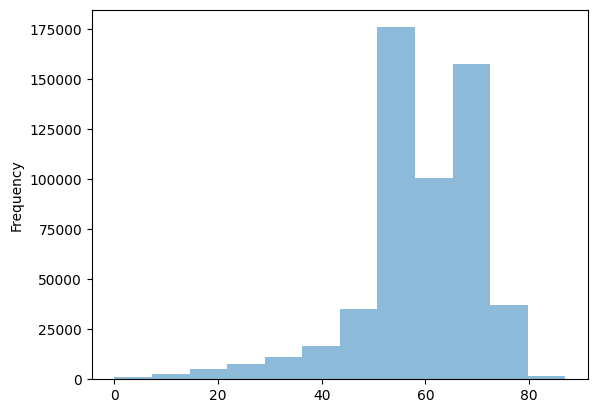

In [18]:
pd_full_lap_info['total_laps'].plot.hist(bins=12, alpha=0.5)

In [19]:
pd_full_lap_info.iloc[36]

raceId                                       841
driverId                                      20
lap                                           37
milliseconds_each_lap                      99321
pit_milliseconds                             0.0
year                                        2011
event_name                 Australian Grand Prix
event_date                            2011-03-27
event_time                              06:00:00
resultId                                   20779
results_car_number                             1
total_laps                                    58
total_race_milliseconds                  5370259
event_fastestLapTime                    1:29.844
Name: 36, dtype: object

In [20]:
pd_full_lap_info.to_csv('../data/02-transformed/transformed-data.csv', index=False)

### (2.7) Filling missing values

In [21]:
pd_full_lap_info['total_race_milliseconds'].loc[(pd_full_lap_info['total_race_milliseconds'] == "\\N")] = pd_full_lap_info['total_race_milliseconds'].min()
pd_full_lap_info['event_fastestLapTime'].loc[(pd_full_lap_info['event_fastestLapTime'] == "\\N")] = pd_full_lap_info['event_fastestLapTime'].min()

In [22]:
pd_full_lap_info['total_race_milliseconds'] = pd_full_lap_info['total_race_milliseconds'].astype(object)

In [23]:
pd_full_lap_info.isna().sum()

raceId                     0
driverId                   0
lap                        0
milliseconds_each_lap      0
pit_milliseconds           0
year                       0
event_name                 0
event_date                 0
event_time                 0
resultId                   0
results_car_number         0
total_laps                 0
total_race_milliseconds    0
event_fastestLapTime       0
dtype: int64

### (2.8) Extract new features

In [24]:
pd_full_lap_info['lap_time_wth_pit'] = pd_full_lap_info.apply(lambda row: row.milliseconds_each_lap - row.pit_milliseconds, axis=1)
pd_full_lap_info.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds', 'year', 'event_name', 'event_date', 'event_time',
       'resultId', 'results_car_number', 'total_laps',
       'total_race_milliseconds', 'event_fastestLapTime', 'lap_time_wth_pit'],
      dtype='object')

In [25]:
pd_full_lap_info['total_race_milliseconds'] = pd_full_lap_info['total_race_milliseconds'].astype(float)
pd_full_lap_info['avg_race_lap_time'] = pd_full_lap_info.apply(lambda row: row.total_race_milliseconds / row.total_laps if row.total_laps != 0 else 0, axis=1)
pd_full_lap_info.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds', 'year', 'event_name', 'event_date', 'event_time',
       'resultId', 'results_car_number', 'total_laps',
       'total_race_milliseconds', 'event_fastestLapTime', 'lap_time_wth_pit',
       'avg_race_lap_time'],
      dtype='object')

In [26]:
def seconder(x):
    mins, secs = map(float, x.split(':'))
    td = timedelta(minutes=mins, seconds=secs)
    return td.total_seconds()

In [27]:
pd_full_lap_info['event_fastestLapTime_seconds'] = pd_full_lap_info['event_fastestLapTime'].apply(seconder)
pd_full_lap_info['event_fastestLapTime_seconds'] = pd_full_lap_info['event_fastestLapTime_seconds'].astype(float)

### (2.9) Dropping merged but unnecessary features

In [28]:
pd_full_lap_info.drop(columns=['results_car_number', 'resultId', 'event_time'], inplace=True)
pd_full_lap_info.columns

Index(['raceId', 'driverId', 'lap', 'milliseconds_each_lap',
       'pit_milliseconds', 'year', 'event_name', 'event_date', 'total_laps',
       'total_race_milliseconds', 'event_fastestLapTime', 'lap_time_wth_pit',
       'avg_race_lap_time', 'event_fastestLapTime_seconds'],
      dtype='object')

In [29]:
pd_full_lap_info.drop(columns=['raceId', 'year', 'event_date', 'pit_milliseconds', 'event_fastestLapTime', 'total_laps', 'total_race_milliseconds'], inplace=True)
pd_full_lap_info.columns

Index(['driverId', 'lap', 'milliseconds_each_lap', 'event_name',
       'lap_time_wth_pit', 'avg_race_lap_time',
       'event_fastestLapTime_seconds'],
      dtype='object')

In [30]:
pd_full_lap_info.dropna(inplace=True)

# Flaw (here): the groupby() method is used here

In [31]:
pd_grouped_data = pd_full_lap_info.groupby(['driverId', 'event_name']).agg(list)
pd_grouped_data.head()

lap  \
driverId event_name                                                                       
1        70th Anniversary Grand Prix  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
         Abu Dhabi Grand Prix         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
         Australian Grand Prix        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
         Austrian Grand Prix          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
         Azerbaijan Grand Prix        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                                  milliseconds_each_lap  \
driverId event_name                                                                       
1        70th Anniversary Grand Prix  [93847, 91440, 91448, 91859, 92698, 92401, 923...   
         Abu Dhabi Grand Prix         [110984, 107726, 107134, 106964, 106549, 10651...   
         Australian Grand Prix        [100573, 93774, 92900, 92582, 92471, 92434, 92...   
         Austrian Grand Prix          [79258, 74138, 73902, 73784, 74225, 74525, 744...   
         Azerbaijan Grand Prix        [112049, 108039, 107780, 106942, 106381, 10686...   

                                                                       lap_time_wth_pit  \
driverId event_name                                                                       
1        70th Anniversary Grand Prix  [93847.0, 91440.0, 91448.0, 91859.0, 92698.0, ...   
         Abu Dhabi Grand Prix         [110984.0, 107726.0, 107134.0, 106964.0, 10654...   
         Australian Grand Prix        [100573.0, 93774.0, 92900.0, 92582.0, 92471.0,...   
         Austrian Grand Prix          [79258.0, 74138.0, 73902.0, 73784.0, 74225.0, ...   
         Azerbaijan Grand Prix        [112049.0, 108039.0, 107780.0, 106942.0, 10638...   

                                                                      avg_race_lap_time  \
driverId event_name                                                                       
1        70th Anniversary Grand Prix  [92179.21153846153, 92179.21153846153, 92179.2...   
         Abu Dhabi Grand Prix         [106034.29090909091, 106034.29090909091, 10603...   
         Australian Grand Prix        [92975.10344827586, 92975.10344827586, 92975.1...   
         Austrian Grand Prix          [74322.64788732394, 74322.64788732394, 74322.6...   
         Azerbaijan Grand Prix        [145916.88235294117, 145916.88235294117, 14591...   

                                                           event_fastestLapTime_seconds  
driverId event_name                                                                      
1        70th Anniversary Grand Prix  [88.451, 88.451, 88.451, 88.451, 88.451, 88.45...  
         Abu Dhabi Grand Prix         [103.461, 103.461, 103.461, 103.461, 103.461, ...  
         Australian Grand Prix        [90.314, 90.314, 90.314, 90.314, 90.314, 90.31...  
         Austrian Grand Prix          [72.217, 72.217, 72.217, 72.217, 72.217, 72.21...  
         Azerbaijan Grand Prix        [103.469, 103.469, 103.469, 103.469, 103.469, ...

In [32]:
pd_full_lap_info['avg_race_lap_time'] = pd_full_lap_info['avg_race_lap_time'].astype(float)
pd_full_lap_info['lap'] = pd_full_lap_info['lap'].astype(float)
pd_full_lap_info['milliseconds_each_lap'] = pd_full_lap_info['milliseconds_each_lap'].astype(float)
pd_full_lap_info['lap_time_wth_pit'] = pd_full_lap_info['milliseconds_each_lap'].astype(float)

In [33]:
print(pd_full_lap_info.shape)
pd_full_lap_info.columns

(551742, 7)


Index(['driverId', 'lap', 'milliseconds_each_lap', 'event_name',
       'lap_time_wth_pit', 'avg_race_lap_time',
       'event_fastestLapTime_seconds'],
      dtype='object')

In [34]:
pd_full_lap_info.to_csv('../data/03-processed/processed-data.csv', index=False)

# Summary

There are a lot of stasticals, feature engineering and ML methods that can be applied during the process of data pre-processing. The above steps just explored a few.

Generally, other methods or techniques should be also considered here. <br><br>
(1) Dimensionality reduction: reduce models to a lower-dimensional space
* Principal Component Analysis (PCA)
* Singular Value Decomposition (SVD)
* Factor Analysis (FA)
* Multidimensional Scaling (MDS)
* T-distributed Stochastic Neighbor Embedding (TSNE)
* etc.

(2) Outlier Detection Methods
* OneClassSVM
* IsolationForest
* LocalOutlierFactor
* EllipticEnvelope

(3) Data Cleaning <br>
(4) Data Integration <br>
(5) Data Transformation <br>
(6) Data Normalization <br>
(7) Feature Selection <br>
(8) Feature Extraction <br>

# Flaw: 

During the generation of time series dataset, originally I would like to use pandas dataframe groupby() to group the features "driverid" and "event_name" to become a tuple to act as the time series data.

However, the grouped data will be multi-dimensional, and it needs more time and efforts to fit them into the Scikit-Learn forecasting algorithms, due to the format limitation. Thereby, I abandoned this way to process the data, and so, the current one is not a __good__ method. 

Therefore, the current time series data will only be used to show the functionality of machine learning pipeline, and _can not reflect the accuracy of time-series forecasting_. 